### Linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).

## y = mx + b       
### m is slope, b is y-intercept

### m = mean(x)*mean(y) - mean(x*y) / (mean(x))^2 - mean(x^2)

### b = mean(y) - m*mean(x)


## R-Squared Theory: to find best fit line
                 
### r^2 = 1 - SE*ycap / SE*ybar    (SE is squared error)

In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

In [2]:
# xs = np.array([1,2,3,4,5,6],dtype=np.float64)
# ys = np.array([5,4,6,5,6,7],dtype=np.float64)

# plt.plot(xs,ys)
# plt.scatter(xs,ys)
# plt.show()

In [3]:
def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys =[]
    for i in range(hm):
        y = val+ random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation =='neg':
            val -=step
    xs = [i for i in range(len(ys))]
    
    return np.array(xs,dtype=np.float64),np.array(ys,dtype=np.float64)

In [4]:
xs, ys = create_dataset(40,30,2,correlation='pos')

In [5]:
def best_fit_slope_and_intercept(x,y):
    m = ((mean(x)*mean(y)) - mean(x*y)) / ((mean(x))**2 - mean(x**2))
    b = mean(y) - m*mean(x)
    return m,b

In [6]:
m,b = best_fit_slope_and_intercept(xs,ys)
print(m,b)

2.2421200750469046 -5.9963414634146375


In [7]:
reg_line = [(m*x)+b for x in xs]

<function matplotlib.pyplot.show(close=None, block=None)>

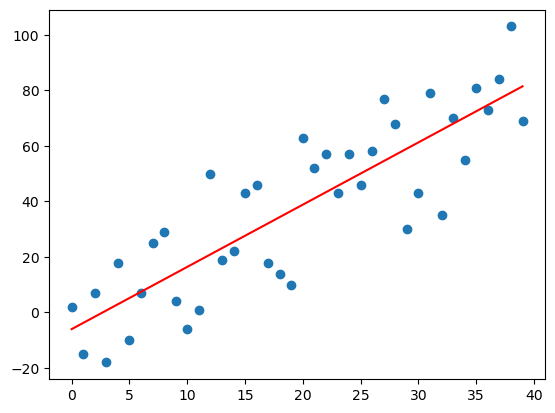

In [8]:
plt.scatter(xs,ys)
plt.plot(xs,reg_line,color='r')
plt.show

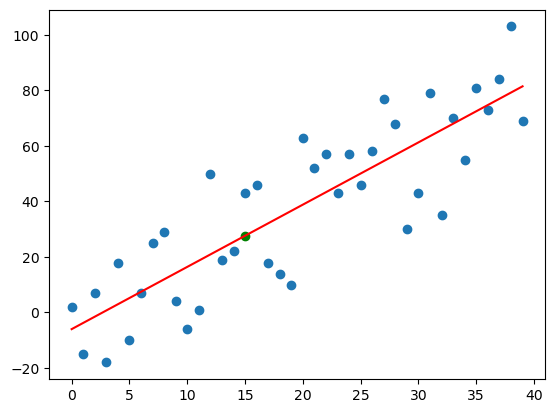

In [9]:
predict_x = 15
predict_y = (m*predict_x) + b

plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y,color='g')
plt.plot(xs,reg_line,color='r')
plt.show()

In [10]:
def squared_error(y_orig,y_line):
    return sum((y_line-y_orig)**2)

In [11]:
def coefficient_of_determination(y_orig,y_line):
    y_mean_line = [mean(y_orig) for y in y_orig]
    squared_error_regr = squared_error(y_orig,y_line)
    squared_error_y_mean= squared_error(y_orig,y_mean_line)
    return 1- (squared_error_regr/squared_error_y_mean)

In [12]:
r_squared = coefficient_of_determination(ys,reg_line)
print(r_squared)

0.7221062364443471
